# Variational Quantum Circuit

Translator: [Wei_zz](https://gitee.com/wei-zz)

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_parameterized_quantum_circuit.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_parameterized_quantum_circuit.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/beginner/parameterized_quantum_circuit.ipynb)

## Summary

Variational quantum circuit(VQC), is an approach for Quantum Machine Learning. The MindSpore Quantum (hybrid framework of quantum and classic machine learning) can process variational quantum circuit and get the derivation of all observation to every parameter respectively by auto differentiating the circuit using quantum neural network.
The process of constructing a quantum circuit and circuit evolution by parameterized simulator operators is as follows:

- Initialize a quantum circuit.

- According to requirements, add parameterized quantum gates or non-parameterized quantum gates to the circuit.

- Process gradient solution or state of evolution by PQC simulator operators.

## Preparing Environment

Import required modules.

In [1]:
import numpy as np                                          # Import numpy library and abbreviate to np
from mindquantum.core.gates import X, Y, Z, H, RX, RY, RZ   # Import the quantum gate H, X, Y, Z, RX, RY, RZ

Note:

1. numpy is a powerful Python library for performing calculations on multidimensional arrays, supporting a large number of dimensional arrays and matrices, in addition to providing a large library of mathematical functions for arrays.

2. mindquantum, a hybrid quantum-classical computing framework, supports the training and inference of a wide range of quantum neural networks.

3. The quantum gates to be executed in the built quantum circuit need to be imported from the mindquantum.core module.

## Quantum Gate

A quantum gate is the basic logic unit to operate quantum bit. For a classic circuit, any logic circuit can consist of some basic logic gates, similarly, any quantum circuit can consist of some basic quantum gates like gates or C-NOT gates acting on a single bit. Commonly used quantum gates include [X](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.XGate.html) gates, [Y](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.YGate.html) gates, [Z](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.ZGate.html) gates, [Hadamard](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.HGate.html) gates, [CNOT](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.CNOTGate.html) gates and some rotation gates.

In general, quantum gates can be classified into parametric and non-parametric quantum gates. For example, the non-parametric quantum gates are [X](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.XGate.html) gate, [Y](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.YGate.html) gate, [Z](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.ZGate.html) gate, [Hadamard](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.HGate.html) gate and [CNOT](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.CNOTGate.html) gate, which have the following matrix forms, respectively:

$$
\text{X}=
\left(
    \begin{matrix}
        0&1\\
        1&0
    \end{matrix}
\right),
\text{Y}=
\left(
    \begin{matrix}
        0&-i\\
        i&0
    \end{matrix}
\right),
\text{Z}=
\left(
    \begin{matrix}
        1&0\\
        0&-1
    \end{matrix}
\right),
\text{H}=\frac{1}{\sqrt{2}}
\left(
    \begin{matrix}
        1&1\\
        1&-1
    \end{matrix}
\right),
\text{CNOT}=
\left(
    \begin{matrix}
        1&0&0&0\\
        0&1&0&0\\
        0&0&0&1\\
        0&0&1&0
    \end{matrix}
\right).$$

Print the matrix form of the above quantum gates separately and we can get:

In [2]:
print('Gate name:', X)
X.matrix()

Gate name: X


array([[0, 1],
       [1, 0]])

In [3]:
print('Gate name:', Y)
Y.matrix()

Gate name: Y


array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

In [4]:
print('Gate name:', Z)
Z.matrix()

Gate name: Z


array([[ 1,  0],
       [ 0, -1]])

In [5]:
print('Gate name:', H)
H.matrix()

Gate name: H


array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

For [CNOT](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.CNOTGate.html) gates, they are essentially Controlled-[X](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.XGate.html) gates, so in MindSpore Quantum, if we need to execute a [CNOT](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.CNOTGate.html) gate, we only need to set the control bits and the target bits of the [X](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.XGate.html) gate (in fact, for any quantum gate we can set the control bits and the target bits of the desired quantum gate operation). For example:

In [6]:
cnot = X.on(0, 1)   # X gate acts on bit 0 quantum bit and is controlled by bit 1 quantum bit
print(cnot)

X(0 <-: 1)


Note:

1. The `X(1 <-: 0)` denotes that the bit 0 quantum bit is the target bit, the bit 1 quantum bit is the control bit, and the bit 0 quantum bit is controlled by the bit 1 quantum bit. Perform [X](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.XGate.html)-gate operation on bit 0 quantum bit if bit 1 is 1, otherwise no operation is performed.

The above describes some quantum gates without parameters. Next, we will introduce some quantum gates with parameters (such as the rotation gate [RX](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RX.html) gate, [RY](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RY.html) gate and [RZ](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RZ.html) gate), which can be obtained by giving certain definite values of the rotation angle $\theta$ that act differently. In addition, these quantum gates with parameters are important building blocks for the subsequent construction of quantum neural networks.

For example, the [RX](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RX.html) gate, [RY](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RY.html) gate and [RZ](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RZ.html) gate have the following matrix form:

$$\text{RX}(\theta)= e^{-\frac{i\theta X}{2}}=\cos\left(\frac{\theta}{2}\right)\cdot I-i\sin\left(\frac{\theta}{2}\right)\cdot X=
\left(
    \begin{matrix}
        \cos\left(\frac{\theta}{2}\right)&-i\sin\left(\frac{\theta}{2}\right)\\
        -i\sin\left(\frac{\theta}{2}\right)&\cos\left(\frac{\theta}{2}\right)
    \end{matrix}
\right),$$

$$\text{RY}(\theta)= e^{-\frac{i\theta Y}{2}}=\cos\left(\frac{\theta}{2}\right)\cdot I-i\sin\left(\frac{\theta}{2}\right)\cdot Y=
\left(
    \begin{matrix}
        \cos\left(\frac{\theta}{2}\right)&-\sin\left(\frac{\theta}{2}\right)\\
        \sin\left(\frac{\theta}{2}\right)&\cos\left(\frac{\theta}{2}\right)
    \end{matrix}
\right),$$

$$\text{RZ}(\theta)= e^{-\frac{i\theta Z}{2}}=\cos\left(\frac{\theta}{2}\right)\cdot I-i\sin\left(\frac{\theta}{2}\right)\cdot Z=
\left(
    \begin{matrix}
        e^{-\frac{i\theta}{2}}&0\\
        0&e^{\frac{i\theta}{2}}
    \end{matrix}
\right).$$

We make $\theta$ be $0$ and $\pi$, respectively, and then print the matrix forms of $\text{RX}(0)$ gates, $\text{RY}(\pi)$ gates and $\text{RZ}(\pi)$ gates. And we can obtain:


In [7]:
rx = RX('theta')
print('Gate name:', rx)
rx.matrix({'theta': 0})   # Assign a value of theta to 0

Gate name: RX(theta)


array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

When $\theta=0$, at this point the $\text{RX}(0)$ gate is the familiar [I](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.IGate.html) gate.

In [8]:
ry = RY('theta')
print('Gate name:', ry)
np.round(ry.matrix({'theta': np.pi}))   # pi needs to be imported from np, assigning the value of theta to pi

Gate name: RY(theta)


array([[ 0.+0.j, -1.+0.j],
       [ 1.+0.j,  0.+0.j]])

When $\theta=\pi$, at this point the $\text{RY}(\pi)$ gate is the familiar [Y](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.YGate.html) gate. (differing by one global phase $i$)

In [9]:
rz = RZ('theta')
print('Gate name:', rz)
np.round(rz.matrix({'theta': np.pi}))   # The value of pi is assigned to theta, and because of the problem of imprecise floating point numbers in computers, the rounded value of the floating point number is returned by the function np.round.

Gate name: RZ(theta)


array([[0.-1.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

When $\theta=\pi$, at this point the $\text{RZ}(\pi)$ gate is the familiar [Z](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.ZGate.html) gate. (differing by one global phase $-i$)

## Quantum Circuit

Quantum circuit is a structure used to effectively organize various quantum logic gates. We can initialize the quantum circuit through the list of quantum gates, or expand the quantum circuit by adding a quantum gate or circuit through addition(`+`), and multiplying by an integer through multiplication(`*`). Here we will construct the following quantum circuit and print the relevant information of the quantum circuit. In the following figure, `q0`, `q1` and `q2` represent three qubits respectively. The quantum circuit consists of three quantum gates, namely the [Hadamard](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.HGate.html) gate acting on `q0` bit, the [CNOT](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.CNOTGate.html) gate acting on `q1` bit and controlled by `q0` bit, and the [RY](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RY.html) rotation gate acting on `q2` bit.

![quantum circuit](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/docs/mindquantum/docs/source_en/images/quantum_circuit.png)

The construction of a quantum circuit can be accomplished quickly by adding quantum gates acting on different quantum bits in the quantum circuit.

In [10]:
from mindquantum.core.circuit import Circuit     # Import Circuit module for building quantum circuit

encoder = Circuit()                              # Initialize quantum circuit
encoder += H.on(0)                               # H-gate acts at bit 0 quantum bit
encoder += X.on(1, 0)                            # The X gate acts on the bit 1 quantum bit and is controlled by the bit 0 quantum bit
encoder += RY('theta').on(2)                     # RY(theta) gate acts on the bit 2 quantum bit

print(encoder)                                   # Print Encoder
encoder.summary()                                # Summarize Encoder quantum circuit

      ┏━━━┓           
q0: ──┨ H ┠───■───────
      ┗━━━┛   ┃       
            ┏━┻━┓     
q1: ────────┨╺╋╸┠─────
            ┗━━━┛     
      ┏━━━━━━━━━━━┓   
q2: ──┨ RY(theta) ┠───
      ┗━━━━━━━━━━━┛   


        Circuit Summary         
╭──────────────────────┬───────╮
│ Info                 │ value │
├──────────────────────┼───────┤
│ Number of qubit      │ 3     │
├──────────────────────┼───────┤
│ Total number of gate │ 3     │
│ Barrier              │ 0     │
│ Noise Channel        │ 0     │
│ Measurement          │ 0     │
├──────────────────────┼───────┤
│ Parameter gate       │ 1     │
│ 1 ansatz parameter   │ theta │
╰──────────────────────┴───────╯

In the Jupyter Notebook environment, you can call the [.svg()](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html#mindquantum.core.circuit.Circuit.svg) method of the quantum [circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html) to draw the image format of the quantum circuit. Calling the `.svg().to_file(filename='circuit.svg')` method of the quantum [circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html) saves the svg image of the quantum circuit to local.

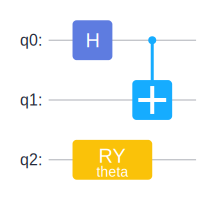

In [11]:
encoder.svg()

From the Summary of Encoder, we can see that the quantum circuit consists of three quantum gates, one of which is a quantum gate with parameters and has the parameter theta, and the number of quantum bits regulated by this quantum circuit is 3.

Therefore, we can build the corresponding quantum circuit according to the problem we need to solve. Go and build your first [quantum circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html)!

In [12]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.23.5
System,Info
Python,3.9.16
OS,Linux x86_64
Memory,8.3 GB
CPU Max Thread,8
Date,Sun Dec 31 23:30:17 2023
